<a href="https://colab.research.google.com/github/tsangrebecca/BloomTech/blob/main/Sprint7/Module1/O2_AvoidLeakageOfInfoFromTestToTrainOrFromTargetToFeatures_Data_wrangling_model_building_and_explore_leaky_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##instances where you can leak data
- having a feature that contains the results, e.g. if you include a feature called "blood_pressure_meds" and trying to predict whether a person has high bp, then people who take blood pressure meds probably have problems with bp to begin with!
- Train-test-contamination: e.g. using mean calculated from entire data set to fill in missing values for training data. Be sure to separate everything from training and testing data. e.g. if you do any transformations before splitting the data into train and test.

In [ ]:
#Import libraries, load data, and view
import pandas as pd
url="https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Kaggle-Challenge/main/data/weather/weatherAUS.csv"

weather=pd.read_csv(url)
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
# Look at the statistics of categorical variables
weather.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,217143,217143,200813,200103,207905,210781,210782
unique,4929,49,16,16,16,2,2
top,2015-11-28,Canberra,W,N,SE,No,No
freq,49,4929,14717,16970,15678,164187,164187


In [ ]:
# Look at the statistics of the numeric variables
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,213597.000000,213784.000000,210781.000000,101279.000000,92165.000000,200920.000000,212983.000000,209412.000000,212294.000000,208212.000000,193119.000000,193138.000000,123473.000000,117663.000000,213519.000000,209360.000000,210782.000000
mean,12.013287,23.132537,2.333787,5.489808,7.617073,40.029041,14.035618,18.581447,68.979076,51.399818,1017.731120,1015.304954,4.655536,4.653697,16.837248,21.613194,2.333630
std,6.437902,7.139490,8.547405,4.226591,3.771815,13.577398,8.886909,8.738994,19.516599,21.083946,7.062112,7.015274,2.897432,2.757064,6.536444,6.993169,8.547207
min,-8.700000,-4.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,979.100000,978.900000,0.000000,0.000000,-6.200000,-5.100000,0.000000
25%,7.400000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,36.000000,1013.000000,1010.500000,1.000000,2.000000,12.100000,16.500000,0.000000
50%,11.800000,22.500000,0.000000,4.800000,8.500000,39.000000,13.000000,17.000000,70.000000,52.000000,1017.700000,1015.200000,6.000000,5.000000,16.600000,21.000000,0.000000
75%,16.700000,28.100000,0.600000,7.400000,10.600000,48.000000,19.000000,24.000000,84.000000,66.000000,1022.600000,1020.200000,7.000000,7.000000,21.400000,26.300000,0.600000
max,33.900000,48.900000,474.000000,138.700000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.100000,1040.100000,9.000000,9.000000,40.200000,48.200000,474.000000


In [ ]:
# Checking for null values
weather.isnull().sum()

Date                  0
Location              0
MinTemp            3546
MaxTemp            3359
Rainfall           6362
Evaporation      115864
Sunshine         124978
WindGustDir       16330
WindGustSpeed     16223
WindDir9am        17040
WindDir3pm         9238
WindSpeed9am       4160
WindSpeed3pm       7731
Humidity9am        4849
Humidity3pm        8931
Pressure9am       24024
Pressure3pm       24005
Cloud9am          93670
Cloud3pm          99480
Temp9am            3624
Temp3pm            7783
RainToday          6362
RISK_MM            6361
RainTomorrow       6361
dtype: int64

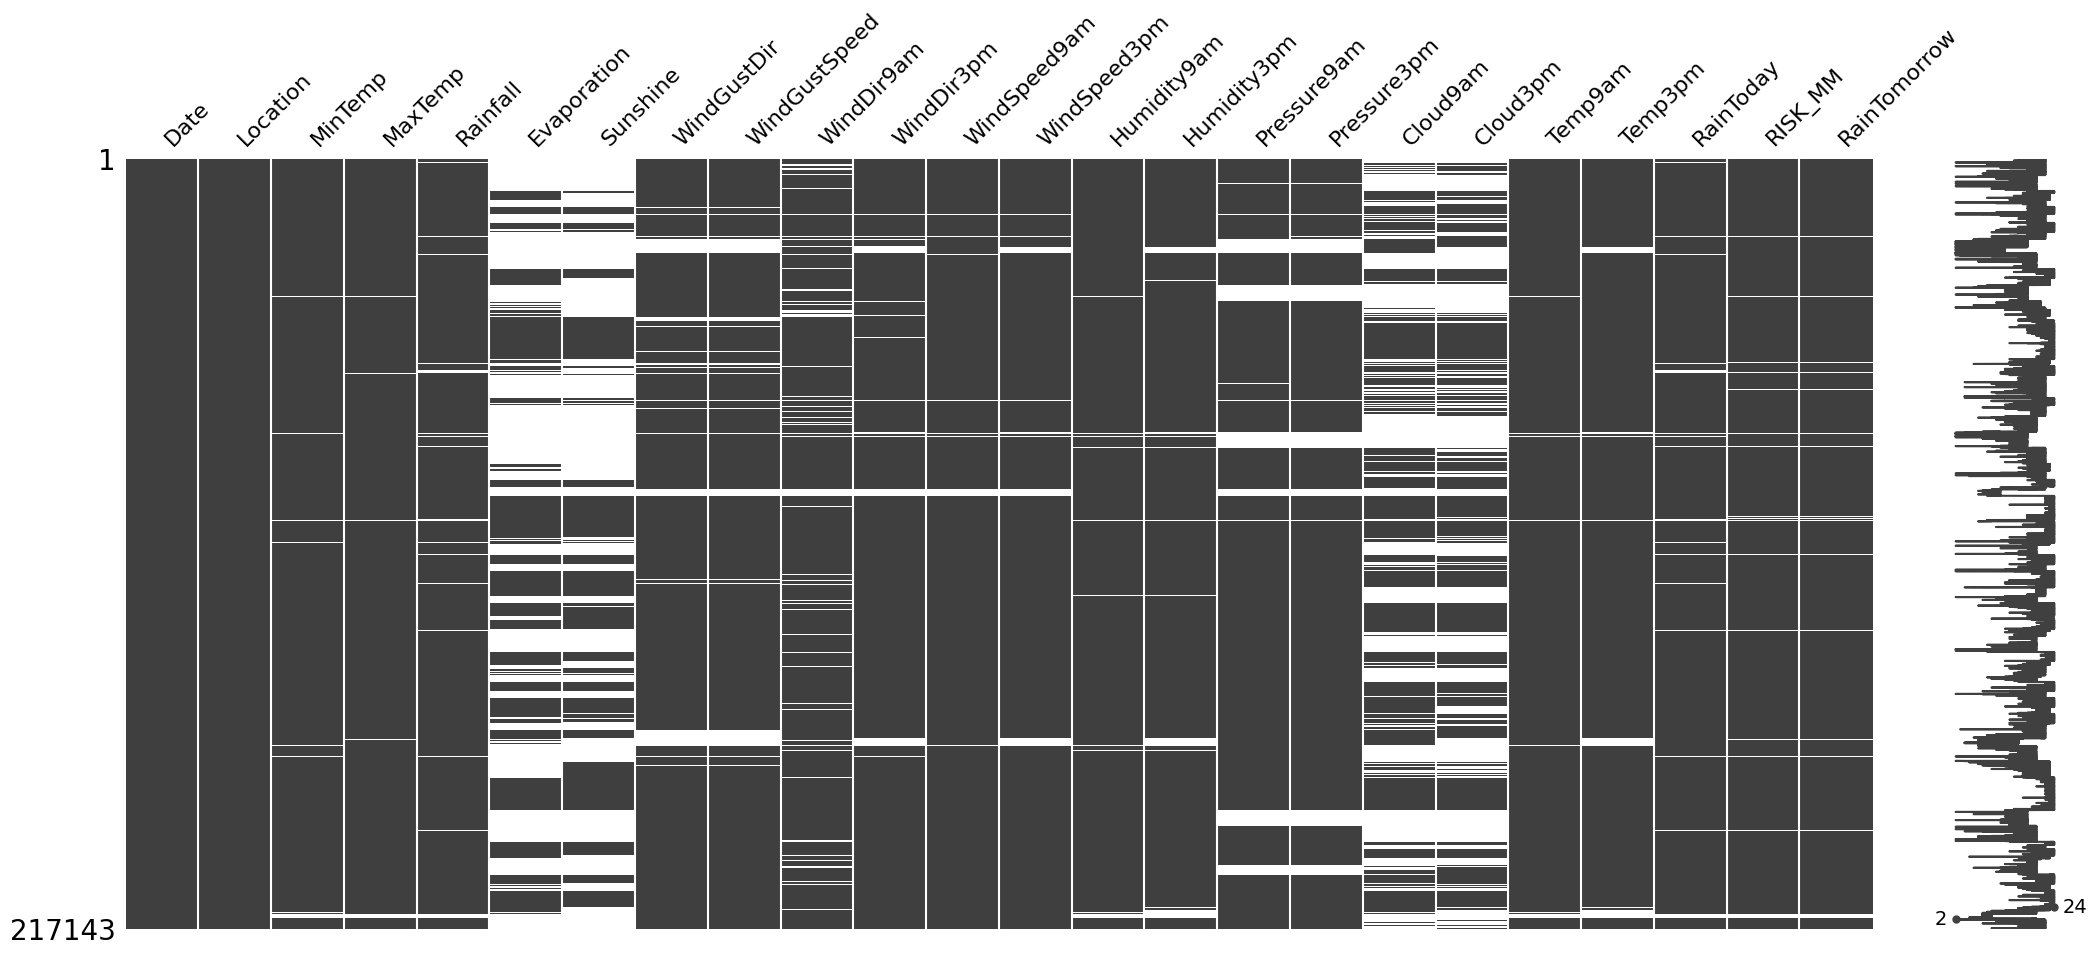

In [ ]:
# visualize where we have missing data
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(weather)

plt.show()

In [ ]:
# Drop columns with high-percentage of missing values
cols_drop = ['Location', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
# we're dropping location column too to keep the process simple so we can focus on identifying leaky features
weather_drop = weather.drop(cols_drop, axis=1)

In [ ]:
# Convert the 'Date' column to datetime, extract month
weather_drop['Date'] = pd.to_datetime(weather_drop['Date'], infer_datetime_format=True).dt.month
weather_drop.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No
1,12,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No
2,12,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No
3,12,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,1.0,No
4,12,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No


In [ ]:
# Print the column names
weather_drop.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM',
       'RainTomorrow'],
      dtype='object')

In [ ]:
# Imports
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Define the numeric features
numeric_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
                    'WindSpeed9am','WindSpeed3pm', 'Humidity9am',
                    'Humidity3pm', 'Pressure9am','Pressure3pm',
                    'Temp9am', 'Temp3pm', 'RISK_MM']

# Create the transformer (impute, scale)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define the categorical features
categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder())])

# Define how the numeric and categorical features will be transformed
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the pipeline steps, including the classifier
clf = Pipeline(steps=[('preprocessor', preprocessor),
                  ('classifier', DecisionTreeClassifier())])

In [ ]:
# Create the feature matrix
X = weather_drop.drop('RainTomorrow', axis=1)

# Create and encode the target array
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
y=label_enc.fit_transform(weather_drop['RainTomorrow'])

In [ ]:
# Import the train_test_split utility
from sklearn.model_selection import train_test_split

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the model
clf.fit(X_train,y_train)
print('Validation Accuracy', clf.score(X_test, y_test))

Validation Accuracy 0.9784706071979553


#It's not normal to have such a high accuracy. We need to find out what's wrong

In [ ]:
# Features (order in which they were preprocessed)
features_order = numeric_features + categorical_features

# Determine the importances
importances = pd.Series(clf.steps[1][1].feature_importances_, features_order)

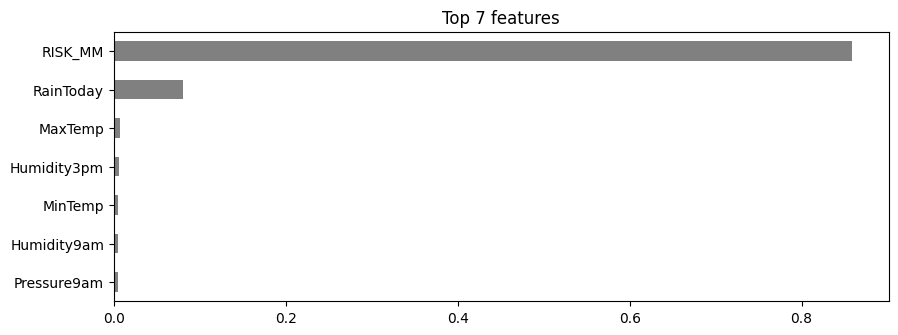

In [ ]:
# Plot feature importances
import matplotlib.pyplot as plt

n = 7
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey')

plt.show()

It looks like the model was essentially fit on a single feature, which must be because the predictor was related to the target array. Spoiler: one of the features is leaking information to the model. It is the RISK_MM column which is essentially how much rain was recorded the following day.

In [ ]:
# We'll remove this column, run the model again, and calculate the features importances.

# Remove the 'RISK_MM' column
X_noriskmm = X.drop('RISK_MM', axis=1)

# Create the new training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_noriskmm, y, test_size=0.2, random_state=42)

# Drop the 'RISK_MM' column from the numeric_features
numeric_features = numeric_features.remove('RISK_MM')

# Fit the model
clf.fit(X_train,y_train)
print('Validation Accuracy (with no "RISK_MM")', clf.score(X_test, y_test))

Validation Accuracy (with no "RISK_MM") 0.7677818968891754


In [ ]:
# That's better! The accuracy is still high, but much more reasonable.

# Get feature importances

# Features (order in which they were preprocessed)
numeric_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
                    'WindSpeed9am','WindSpeed3pm', 'Humidity9am',
                    'Humidity3pm', 'Pressure9am','Pressure3pm',
                    'Temp9am', 'Temp3pm']

categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
features_order = numeric_features + categorical_features

importances = pd.Series(clf.steps[1][1].feature_importances_, features_order)

In [ ]:
# Plot feature importances

n = 7
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey')

plt.clf()

<Figure size 1000x350 with 0 Axes>

In [ ]:
# the feature importances graph (that for some reason is not showing here) look much more reasonable without one sticking out by too much